In [55]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [56]:
def LinearRegressionModel(X, y, with_fit_intercept):
    # Inputs:                                                                   
    # X = N x d, d means the number of features/attributes                                                              
    # y = N x 1                                                                 
    # Output:                                                                   
    # Linear regression model
    
    # IMPLEMENT THIS METHOD USING sklearn.linear_model.LinearRegression. 
    # By default, fit_intercept=True, but in this problem, you need to assign a value with_fit_intercept to fit_intercept.
    clf = LinearRegression(fit_intercept=with_fit_intercept).fit(X, y)
    
    
    return clf

In [57]:
def learnOLERegression(X,y):
    # Inputs:                                                                   
    # X = N x d, d means the number of features/attributes                                                                 
    # y = N x 1                                                                 
    # Output:                                                                   
    # w = d x 1                                                                 
    
    # IMPLEMENT THIS METHOD, please refer to the sample code named 'lecture_6.ipynb'
    Xt = np.transpose(X)              
    dot1 = np.dot(Xt,X)                
    inverse = inv(dot1)                
    w = np.dot(inverse, np.dot(Xt,y))
    
    
    return w

In [58]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1, d means the number of features/attributes
    # Xtest = N x d, d means the number of features/attributes
    # ytest = X x 1
    # Output:
    # mse
    
    # IMPLEMENT THIS METHOD
    f1 = np.dot(Xtest, w)
    f2 = ytest - f1
    f3 = np.transpose(f2)
    f4 = np.dot(f3, f2)
    
    N = Xtest.shape[0]
    
    mse = f4 / N
    
    mse = float(mse)
    
    
    return mse

In [59]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:                                                                   
    # X = N x d, d means the number of features/attributes                                                                 
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                   
    # w = d x 1        
    
    # IMPLEMENT THIS METHOD. 
    # This function is similar to 'learnOLERegression'. 
    # The difference is that we need to add an identity matrix with X_T_X.
    f1 = np.transpose(X)
    f2 = np.dot(f1, X)

    I_matrix = np.eye(X.shape[1])

    f3 = np.dot(lambd, I_matrix)

    f4 = inv(f2 + f3)

    f5 = np.dot(f4, np.transpose(X))

    w = np.dot(f5, y)
    
    
    return w

In [60]:
def RidgeRegressionModel(X, y, alpha_value):
    # Inputs:                                                                   
    # X = N x d, d means the number of features/attributes                                                                 
    # y = N x 1                                                                 
    # Output:                                                                   
    # Linear regression model
    
    # IMPLEMENT THIS METHOD USING sklearn.linear_model.Ridge
    clf = Ridge(alpha = alpha_value).fit(X,y)
    
    return clf

In [61]:
def mapNonLinear(x,p):
    # Inputs:                                                                   
    # x - a single column vector (N x 1)                                        
    # p - integer (>= 0)                                                        
    # Outputs:                                                                  
    # The shape of Xd is (N x (d+1))                                                      

    # IMPLEMENT THIS METHOD
    Xd = np.zeros((x.shape[0],p+1)) # initialize matrix
    for i in range(p+1):
        # FILL IN: assign values to each columun Xd[:,i]
        Xd[:, i] = np.power(x, i)
    
    
    return Xd


In [62]:
def regressionObjVal(w, X, y, lambd):
    # this function is only used for Problem 5!
    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  
    
    # IMPLEMENT THIS METHOD 
    w = np.transpose(np.asmatrix(w))
    
    # fill in
    Xw = np.dot(X,w)
    f1 = np.transpose(y-Xw)
    f2 = y-Xw
    f3 = np.dot(f1,f2)
    wt= np.transpose(w)
    ww = np.dot(wt,w)
    f4 = np.dot(lambd,ww)
    f5 = f3+f4
    
    Xt = np.transpose(X)
    X2 = -2 * Xt
    f6 = np.dot(X2,f2)
    f7 = np.dot(lambd, w)
    f8 = 2 * f7
    f9 = f6 + f8
    
    error = f5
    error_grad = f9
    
    error_grad = np.squeeze(np.array(error_grad))
    
    
    return error, error_grad

In [63]:
# Main script

# Problem 1
# Input data
X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(X),1))
x2 = np.ones((len(Xtest),1))

X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)


# Scikit package
clf_without_intercept = LinearRegressionModel(X, y, False)
w_lr = clf_without_intercept.coef_[0]
w_lr = w_lr.reshape((len(w_lr), 1))
mle_lr = testOLERegression(w_lr,Xtest,ytest)
print('Sklearn MSE without intercept '+str(mle_lr))

clf_with_intercept = LinearRegressionModel(X, y, True)
w_i_lr = np.concatenate((clf_with_intercept.intercept_, clf_with_intercept.coef_[0]), axis = 0)
w_i_lr = w_i_lr.reshape((len(w_i_lr), 1))
mle_i_lr = testOLERegression(w_i_lr,Xtest_i,ytest)
print('Sklearn MSE with intercept '+str(mle_i_lr))

# Matrix computation 
w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('OLE MSE without intercept '+str(mle))
print('OLE MSE with intercept '+str(mle_i))

Sklearn MSE without intercept 106775.36145122662
Sklearn MSE with intercept 3707.840180960858
OLE MSE without intercept 106775.36155877906
OLE MSE with intercept 3707.8401813084


The smallest Sklearn MSE: 2850.8958561367936
The corresponding alpha for Sklearn: 0.06
The smallest OLE MSE: 2851.3302134438477
The corresponding alpha for OLE: 0.06


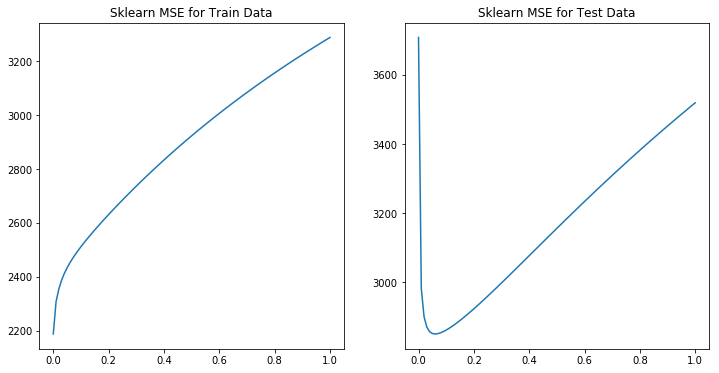

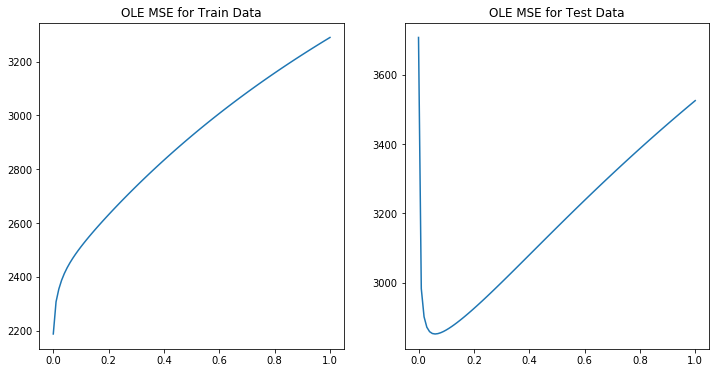

In [64]:
# Problem 2
k = 101
alphas = np.linspace(0, 1, num=k)
i = 0
mses2_train_rr = np.zeros((k,1))
mses2_rr = np.zeros((k,1))
for alpha in alphas:
    clf = RidgeRegressionModel(X,y,alpha)
    w_l_rr = np.concatenate((clf.intercept_, clf.coef_[0]), axis = 0)
    w_l_rr = w_l_rr.reshape((len(w_l_rr), 1))
    mses2_train_rr[i] = testOLERegression(w_l_rr,X_i,y)
    mses2_rr[i] = testOLERegression(w_l_rr,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(alphas,mses2_train_rr)
plt.title('Sklearn MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(alphas,mses2_rr)
plt.title('Sklearn MSE for Test Data')

# mses2_rr represents the errors on the testing data of different alpha's 
# 1. obtain the smallest mse
min_mse_sklearn = np.min(mses2_rr)
print('The smallest Sklearn MSE:', min_mse_sklearn)
# 2. obtain the index of the smallest mse
index_min_mse_sklearn = np.argmin(mses2_rr)
# 3. obtain the corresponding alpha
min_alpha_sklearn = alphas[index_min_mse_sklearn]
print('The corresponding alpha for Sklearn:', min_alpha_sklearn)

i = 0
mses2_train = np.zeros((k,1))
mses2 = np.zeros((k,1))
for alpha in alphas:
    w_l = learnRidgeRegression(X_i,y,alpha)
    mses2_train[i] = testOLERegression(w_l,X_i,y)
    mses2[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(alphas,mses2_train)
plt.title('OLE MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(alphas,mses2)
plt.title('OLE MSE for Test Data')

# mses2 represents the errors on the testing data of different alpha's 
# 1. obtain the smallest mse
min_mse_ole = np.min(mses2)
print('The smallest OLE MSE:', min_mse_ole)
# 2. obtain the index of the smallest mse
index_min_mse_ole = np.argmin(mses2)
# 3. obtain the corresponding alpha
min_alpha_ole = alphas[index_min_mse_ole]
print('The corresponding alpha for OLE:', min_alpha_ole)

Training errors of linear models without using the regularization term:
p = 0 training error = 5650.710538897616
p = 1 training error = 3930.9154073159016
p = 2 training error = 3911.8396712049557
p = 3 training error = 3911.1886649314497
p = 4 training error = 3885.473068112271
p = 5 training error = 3885.407157397081
p = 6 training error = 3866.88344944605
Training errors of linear models using the regularization term:
p = 0 training error = 5650.711907032115
p = 1 training error = 3951.8391235601057
p = 2 training error = 3950.6873123755195
p = 3 training error = 3950.682531518713
p = 4 training error = 3950.682336795369
p = 5 training error = 3950.6823351770195
p = 6 training error = 3950.6823351427815
Testing errors of linear models without using the regularization term:
p = 0 testing error = 6286.404791680896
p = 1 testing error = 3845.034730173414
p = 2 testing error = 3907.1280991079375
p = 3 testing error = 3887.9755382360127
p = 4 testing error = 4443.327891813304
p = 5 testi

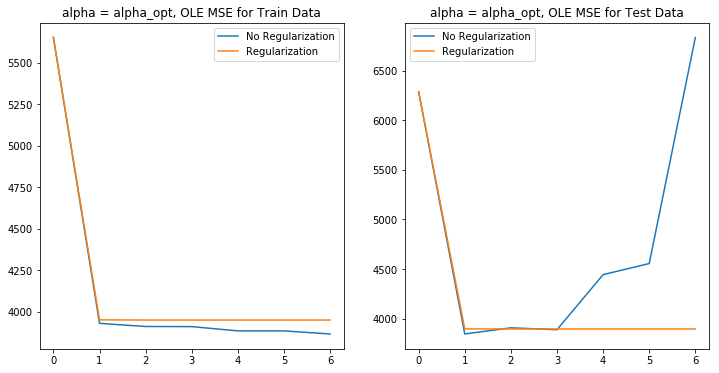

In [65]:
# Problem 3
pmax = 7
alpha_opt = alphas[np.argmin(mses2)]
mses3_train = np.zeros((pmax,2))
mses3 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0) # alpha = 0
    mses3_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses3[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,alpha_opt) # alpha = alpha_opt
    mses3_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses3[p,1] = testOLERegression(w_d2,Xdtest,ytest)
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses3_train)
plt.title('alpha = alpha_opt, OLE MSE for Train Data')
plt.legend(('No Regularization','Regularization'))

plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses3)
plt.title('alpha = alpha_opt, OLE MSE for Test Data')
plt.legend(('No Regularization','Regularization'))

# print the training erros for different p's
# the first columun means the errors of linear models without using the regularization term
print('Training errors of linear models without using the regularization term:')
for i in range(pmax):
    print('p =',i, 'training error =', mses3_train[i][0])
# the second columun means the errors of linear models using the regularization term

print('Training errors of linear models using the regularization term:')
for i in range(pmax):
    print('p =',i, 'training error =', mses3_train[i][1])

# print the testing erros for different p's
# the first columun means the errors of linear models without using the regularization term
print('Testing errors of linear models without using the regularization term:')
for i in range(pmax):
    print('p =',i, 'testing error =', mses3[i][0])
# the second columun means the errors of linear models using the regularization term

print('Testing errors of linear models using the regularization term:')
for i in range(pmax):
    print('p =',i, 'testing error =',mses3[i][1])

<Figure size 720x576 with 0 Axes>

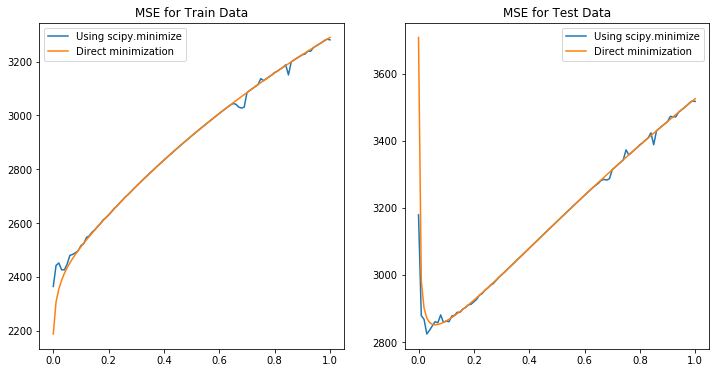

In [67]:
# Problem 5
fig = plt.figure(figsize=[10,8])
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses5_train = np.zeros((k,1))
mses5 = np.zeros((k,1))

opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses5_train[i] = testOLERegression(w_l,X_i,y)
    mses5[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses5_train)
plt.plot(lambdas,mses2_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses5)
plt.plot(lambdas,mses2)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])